# What to expect

We will start our analysis from the mapped reads, as explained in the introduction. The mapping was done using the packgae STAR. In this notebook we will take a look at the outputs generated by STAR for the <i>Schistosoma mansoni</i> dataset. We will guide you through the process of combining the results for each sample in the dataset into a single dataframe and viewing them using Principle Components Analysis. In the second part of this session, you will repeat this process for your choice of dataset in notebook 2B.

# The files

For each dataset, you will find some information in `data/<dataset>`:

1. `README` file with information on how the data was generated
2. `list_ids` file with the names of the samples
3. `metadata` file with information on the experimental conditions for each sample

For each dataset, you will also find some files stored in `analysis/<dataset>`:

1. `star` folder - contains some of the outputs generated by STAR (others have been omitted to save space)
2. `multiqc` folder - contains a summary of the quality of mappings by STAR

We will use these files to complete our analysis

# Checking the quality of mapping
We have mapped our reads to the genome, so we can find out how much each gene is expressed in our samples. But before moving on to the next step, we should check that our mapping was good. 

As explained before, the number of reads that map to a gene gives us a meaure of how much that gene is being expressed. Therefore, for us to be confident in our quantification, each read should map to one and only one gene in the reference genome. However, this might not be the case if some reads are short and map to several genes, for example, or due to other technical reasons.   

One of the tools frequently used to check if the mapping was good is [MultiQC](https://multiqc.info/). MultiQC analyses the mapping for each of our samples and produces an HTML report summarizing it. We have run MultiQC on our files and provided it in the analysis subdirectories. Try opening `analysis/Schistosoma_mansoni/multiqc/multiqc_report.html` by double-clicking (you may need to click trust HTML in a banner).

<div class="alert alert-block alert-warning">

Discuss in your group:

- What % of reads mapped to only one gene of the reference genome?
- Are there any samples that look less good? In what way? How might this impact your results?

# Combining data accross samples

Now that we are happy with our mapping, we can move on with the analysis. 

In the `star` folder there is a file for each of our samples. Each file contains the mapping result for that particular sample. Let's have a look at the mapping results for one of the samples

In [1]:
! head -n 30 analysis/Schistosoma_mansoni/star/ERR022875/ERR022875ReadsPerGeneUnst.out.tab

N_unmapped	4374914
N_multimapping	1520436
N_noFeature	2230500
N_ambiguous	30599
gene:Smp_329140	0
gene:Smp_315690	0
gene:Smp_317470	0
gene:Smp_318880	34
gene:Smp_319020	0
gene:Smp_349630	0
gene:Smp_349560	0
gene:Smp_179970	22
gene:Smp_173350	14
gene:Smp_317840	0
gene:Smp_165590	0
gene:Smp_165600	0
gene:Smp_319240	0
gene:Smp_319340	145
gene:Smp_350240	0
gene:Smp_243170	170
gene:Smp_199340	1
gene:Smp_180260	0
gene:Smp_311250	1
gene:Smp_349570	0
gene:Smp_242000	0
gene:Smp_078490	0
gene:Smp_164480	15
gene:Smp_350510	0
gene:Smp_201260	0
gene:Smp_099150	13887


To analyse the data further, we need to combine the results form each sample in one dataframe, which will be out master dataframe.  

The dataframe should have the gene name as index, and a column of reads per gene for each sample. Each column should have the accession number of that sample as column name.

We will create this dataframe using the pandas python library, which you are familiar with. 

<div class="alert alert-block alert-warning">
    
Try to fill the gaps `...` in the code below to create the master dataframe.

In [ ]:
# Import pandas
import pandas as pd

# Create a new list called accessions
...
# loop throught the list_ids.txt file and add each accession number into the new list
# make sure that any whitespace or newline characters are removed before adding the accession number to the list
with ...

# Create the master dataframe
master_df = None

# Create a loop that for each accession in the accession list, will:
# (1) print the accession number (sanity check)
# (2) read the ReadsPerGeneUnst.out.tab file for that same accession number into a temporary dataframe called counts_df
# that has the gene names column as index and has the column names ["gene", "reads"]
# (3) copy the data from the column corresponding to the correct strandedness to a new column named as the sample accession
# (4) create another temporary dataframe that contains only the column named as the sample accession
# (5) use a dataframe join to add this column to the master dataframe. Note that the indexes may not be the same

for ... :
    print(accession)
    f = f"analysis/Schistosoma_mansoni/star/{accession}/{accession}ReadsPerGeneUnst.out.tab"
    counts_df = ...
    ...
    ...
    if ... :
        master_df = ...
    else:
        master_df = ...
        
# Finally, remove the first 4 rows of the master dataframe, as they contained only summary information
# and replace any empty values with 0
master_df = ...
...
# save the dataframe as a csv file
master_df.to_csv(f"analysis/Schistosoma_mansoni/star/ReadsPerGene.csv")
# have a look at the master_df
master_df

In [20]:
# Import pandas
import pandas as pd

# Create a new list called accessions
accessions = []
# loop throught the list_ids.txt file and add each accession number into the new list
# make sure that any whitespace or newline characters are removed before adding the accession number to the list
with open(f"data/Schistosoma_mansoni/list_ids.txt", "r") as f:
    for line in f:
            accessions.append(line.strip())

# Create the master dataframe
master_df = None


# Create a loop that for each accession in the accession list, will:
# (1) print the accession number (sanity check)
# (2) read the ReadsPerGene.out.tab file for that same accession number into a temporary dataframe that has
# the gene names column as index and has the column names ["gene", "reads"]
# (3) copy the data from the column corresponding to the correct strandedness to a new column
# named as the sample accession
# (4) create another temporary dataframe that contains only the column named as the sample accession
# (5) use a dataframe join to add this column to the master dataframe. Note that the indexes may not be the same

for accession in accessions:
    print(accession)
    f = f"analysis/Schistosoma_mansoni/star/{accession}/{accession}ReadsPerGeneUnst.out.tab"
    counts_df = pd.read_csv(f, index_col=0, sep="\t", names=["gene", "reads"])
    counts_df[accession] = counts_df["reads"]
    accession_df = counts_df[[accession]]
    if master_df is not None:
        master_df = master_df.join(accession_df, how='outer')
    else:
        master_df = accession_df
# Finally, remove the first 4 rows of the master dataframe, as they contained only summary information
# and replace any empty values with 0
master_df = master_df.iloc[5:]
master_df.fillna(0,inplace=True)
# save the dataframe as a csv file
master_df.to_csv(f"analysis/Schistosoma_mansoni/star/ReadsPerGene.csv")
# have a look at the master_df
master_df

ERR022872
ERR022873
ERR022874
ERR022875
ERR022876
ERR022877
ERR022878
ERR022879
ERR022880
ERR022881
ERR022882
ERR022883


,ERR022872,ERR022873,ERR022874,ERR022875,ERR022876,ERR022877,ERR022878,ERR022879,ERR022880,ERR022881,ERR022882,ERR022883
gene,,,,,,,,,,,,
gene:Smp_000020,3210,2088,1110,2285,4027,5330,3281,9008,8140,7242,6129,6792
gene:Smp_000030,12471,11096,5521,9389,18769,23578,17393,26427,23891,23569,21432,22569
gene:Smp_000040,2613,6520,1253,1883,4733,4596,3082,12887,11370,10838,9726,10749
gene:Smp_000050,921,674,933,213,3709,1575,1104,18191,8154,6218,5800,7325
gene:Smp_000070,1417,951,435,647,1533,2135,1618,2030,2333,2397,2197,2459
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:Smp_900070,53596,23333,1567,41482,8333,44138,32248,5266,7790,9944,20894,16959
gene:Smp_900080,3680,3647,129,4700,719,18493,8234,786,1357,1056,2559,2469
gene:Smp_900090,157096,61805,5871,196705,28999,206111,156191,8468,13032,14253,37073,28150


# Normalization
The number of reads mapping to each gene is proportional to the number of expressed transcripts of those genes in each sample. We want to measure which genes are differentially expressed between the different developmental stages. However there are other factors which affect the number of reads mapping such as sequencing depth (which differs between samples) and gene length (which differs between genes) as well as the overall RNA composition (e.g. a small number of very highly expressed genes or a difference in the overall number of genes expressed between samples can skew some methods). Normalization is the process of scaling the raw counts to account for these other factors so that the expression levels are more comparable.

There are [different methods for normalization](https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html) depending on the comparison we want to perform. For example, an analysis might look within a single sample to see which genes are mostly highly expressed in that sample. It might look at which genes are most highly expressed in a sample group representing a single tissue type or developmental stage. Or it might look at the differential expression (DE) between 2 different sample groups. The following table is taken from this Harvard Chan Bioinformatics Core tutorial:

|                                 Normalization method                                |                                                          Description                                                         |                  Accounted factors                 |                                               Recommendations for use                                               |
|:-----------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|
| CPM (counts per million)                                                            | counts scaled by total number of reads                                                                                       | sequencing depth                                   | gene count comparisons between replicates of the same sample group; NOT for within sample comparisons or DE analysis |
| TPM (transcripts per kilobase million)                                              | counts per length of transcript (kb) per million reads mapped                                                                | sequencing depth and gene length                   | gene count comparisons within a sample or between samples of the same sample group; NOT for DE analysis             |
| RPKM/FPKM (reads/fragments per kilobase of exon per million reads/fragments mapped) | similar to TPM                                                                                                               | sequencing depth and gene length                   | gene count comparisons between genes within a sample; NOT for between sample comparisons or DE analysis             |
| DESeq2’s median of ratios                                                      | counts divided by sample-specific size factors determined by median ratio of gene counts relative to geometric mean per gene | sequencing depth and RNA composition               | gene count comparisons between samples and for DE analysis; NOT for within sample comparisons                       |
| EdgeR’s trimmed mean of M values (TMM)                                        | uses a weighted trimmed mean of the log expression ratios between samples                                                    | sequencing depth, RNA composition, and gene length | gene count comparisons between and within samples and for DE analysis                                               |

In this case, we will use the DESeq2 inbuilt method for normalization. To implement it, we will use the python package [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/api/index.html). 

This method requires two inputs:

- a table with all our counts, just like the dataframe we havejust created (although it needs to be transposed, so the sample names are in the first column) 
- a metadata table that specifies what each sample is

<div class="alert alert-block alert-warning">
    
Try to fill the gaps `...` in the code below to create the counts and the metadata tables

In [ ]:
#let's create the counts matrix by transposing our master_df
counts = ...

#lets create the metadata table. The index should be the accession number. Let's have a look at it to make sure it loks right.
metadata = ...
print(metadata)

In [21]:
#let's create the counts matrix by transposing our master_df
counts = master_df.T

#lets create the metadata table. The index should be the accession number. Let's have a look at it to make sure it loks right.
metadata = pd.read_csv("data/Schistosoma_mansoni/metadata.csv", index_col=0)
print(metadata)

                          stage
accession                      
ERR022872             cercarium
ERR022873   platyhelminth adult
ERR022874   3 hr schistosomulum
ERR022875             cercarium
ERR022876   3 hr schistosomulum
ERR022877             cercarium
ERR022878             cercarium
ERR022879   3 hr schistosomulum
ERR022880  24 hr schistosomulum
ERR022881  24 hr schistosomulum
ERR022882  24 hr schistosomulum
ERR022883  24 hr schistosomulum


We are now ready to go ahead with the PyDESeq2 analysis

In [22]:
#To start the analysis, let's intall PyDESeq2
! pip install --quiet pydeseq2

# and import the "DeseqDataSet" class from the dds module of PyDESeq2
from pydeseq2.dds import DeseqDataSet

Now, we will use the DeseqDataSet class to create a "dds" object, which is an [AnnData](https://anndata.readthedocs.io/en/latest/generated/anndata.AnnData.html#anndata.AnnData) object. To create the dds object, we provide some arguments: 

- `counts` is our transposed master_df matrix
- `metadata` is our metadata table that we just created
- `refit_cooks` indicates whether Cook's distance should be recalculated during the analysis. You do not have to worry about the details, we will just indicate that we do want to recalculate Cook's distance.
- `design_factors` is where we indicate what is the factor we want to use to compare samples. In our experiment we want to compare gene expression between the different developmental stages, so we specify "stage" as our design factor

In [23]:
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    refit_cooks=False,
    design_factors="stage"
)

dds

/tmp/ipykernel_119/2885089110.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


AnnData object with n_obs × n_vars = 12 × 9896
    obs: 'stage'
    obsm: 'design_matrix'

Once we have created the dds object, we will apply the `deseq2` method to it. This method normalises the data, estimates the dispersion and calculates the log fold change (LFC) based on the design factor.

In [24]:
dds.deseq2()
dds

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.99 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 14.92 seconds.

Fitting LFCs...
... done in 6.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.



AnnData object with n_obs × n_vars = 12 × 9896
    obs: 'stage'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

Note that new elements have been added to the AnnData object, included LFC and normed counts, for example. Let's have a look at the normed counts

In [25]:
# View the normed counts
dds.layers['normed_counts']

array([[  5156.66498438,  20033.88442997,   4197.62168355, ...,
        252364.93532274,  16792.09317187, 221281.97246207],
       [  3719.68204557,  19767.04596629,  11615.0991078 , ...,
        110102.94484015,  20912.5227648 , 107500.23628241],
       [  4109.11348136,  20438.21218973,   4638.48575869, ...,
         21733.87860277,    544.17989348,  15255.54653756],
       ...,
       [  3989.22181854,  12982.87338321,   5970.06159478, ...,
          7851.19836781,    451.14231834,   7529.50470004],
       [  3821.27273688,  13362.29683421,   6063.90906166, ...,
         23114.05517612,   5348.16079898,  26278.80968948],
       [  3685.40550292,  12246.15971664,   5832.51233081, ...,
         15274.46479788,   2481.89705099,  16301.08246742]])

# PCA Plot

In our experiment, we have 12 different samples (three replicates of 3 hr schistosomulum, four replicates of 24 hr schistosomulum, four replicates of cercarium and one replicate of platyhelminth adult) and from each of these samples, we have gene counts for thousands of genes. It would be useful at this point to have an overview of the data. We expect the replicates within each stage to be very similar between them, but to be different from the other stages.  Principal Component Analysis (PCA) helps us do this.  It is a technique that looks at all the results from an experiment and identifies which of those results are different between samples. In our experiment, it will look at all the normalised gene counts and construct groups of genes ("components") that describe as much of the variation between samples as possible. Plotting the first 2 components identified in the analysis can therefore be a useful way to visualize the effect of experimental covariates as well as batch effects.

We are going to use PCA to have a look at our data. We will perform the PCA and create the plot with the python library [scanpy](https://scanpy.readthedocs.io/en/stable/)

In [26]:
! pip install --quiet scanpy

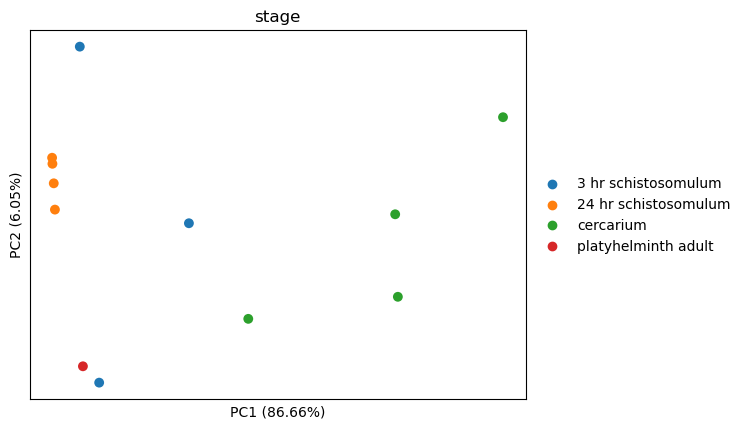

In [27]:
import scanpy as sc

# Use scanpy to plot the first 2 components
sc.tl.pca(dds)
sc.pl.pca(dds, size=200, color="stage", annotate_var_explained=True)

<div class="alert alert-block alert-warning">

Discuss in your group:
- Is there a separation of the different developmental stages in the PCA plot?
- How much variance is explained by the first 2 principal components?
- What is PC1 separating?
- What is PC2 separating?

We can now look at which genes are contributing to each component, and compares how much each gene contribute. This is called "loadings".

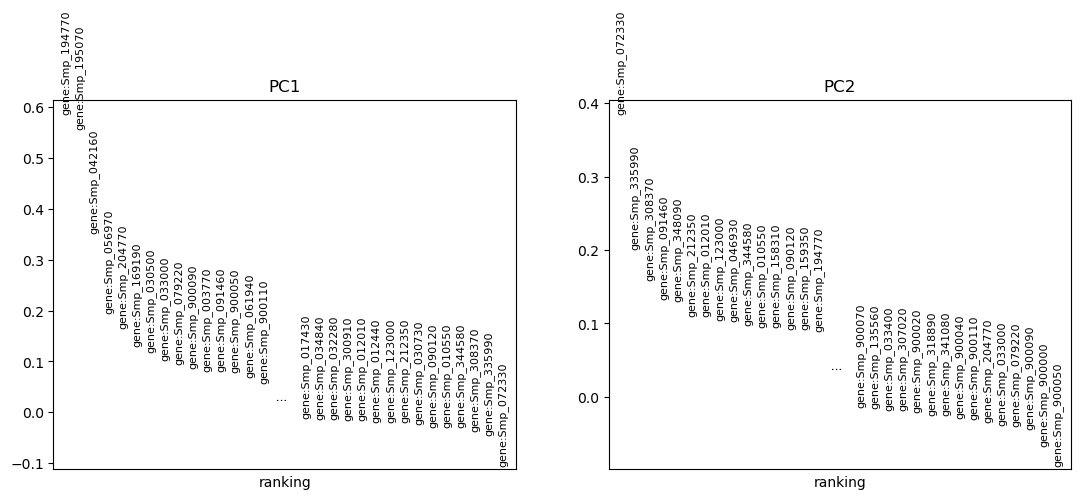

In [28]:
sc.pl.pca_loadings(dds, components = '1,2')

<div class="alert alert-block alert-warning">

Discuss in your group:

- Which 3 genes contribute most to PC1?
- Which 2 contribute most to PC2?